# A/B Testing Case Study

A/B testing is a common technique used in various fields, including marketing, web design, and product development, to compare two versions of a product or service to determine which performs better.

In this notebook, we will:

1. Analyze data from an A/B test scenario.
2. Use the Central Limit Theorem and Gaussian distribution to analyze the test results.
3. Compute confidence intervals and perform hypothesis testing.

## Scenario: Testing a New Website Design

Assume we have two versions of a website: Version A (the control) and Version B (the variant). We want to test whether Version B leads to higher spending by users compared to Version A.

## Loading the A/B Test Data

For this case study, assume we have collected the following data:

- **n_A**: Number of users who visited Version A
- **n_B**: Number of users who visited Version B
- **spend_A**: Total dollars spent by users who visited Version A
- **spend_B**: Total dollars spent by users who visited Version B

Let's load and examine this data.


In [ ]:
# Assume the data is already loaded
n_A = 1000  # Number of users who visited Version A
n_B = 1000  # Number of users who visited Version B

# Total dollars spent
spend_A = 105000  # Total dollars spent by users in Version A
spend_B = 117000  # Total dollars spent by users in Version B

# Calculate the average spending per user
mean_spend_A = spend_A / n_A
mean_spend_B = spend_B / n_B

print(f"Average Spending per User for Version A: ${mean_spend_A:.2f}")
print(f"Average Spending per User for Version B: ${mean_spend_B:.2f}")


## Applying the Central Limit Theorem

According to the Central Limit Theorem, the distribution of the difference in average spending can be approximated by a normal distribution, given a large enough sample size.

Let's calculate the standard error and construct a confidence interval for the difference in average spending between the two versions.


In [ ]:
# Standard deviation of spending (assuming for simplicity)
std_spend_A = 50  # Assumed standard deviation for Version A
std_spend_B = 55  # Assumed standard deviation for Version B

# Calculate the standard error of the difference in mean spending
se_A = std_spend_A / np.sqrt(n_A)
se_B = std_spend_B / np.sqrt(n_B)
se_diff = np.sqrt(se_A**2 + se_B**2)

# Difference in average spending
diff = mean_spend_B - mean_spend_A

# 95% Confidence Interval
z_score = norm.ppf(0.975)
ci_lower = diff - z_score * se_diff
ci_upper = diff + z_score * se_diff

print(f"Difference in Average Spending: ${diff:.2f}")
print(f"95% Confidence Interval: [${ci_lower:.2f}, ${ci_upper:.2f}]")


## Hypothesis Testing

We can perform a hypothesis test to determine if the observed difference in average spending is statistically significant.

### Null Hypothesis ($ H_0 $):
The average spending per user for Version A and Version B is equal ($ \mu_A = \mu_B $).

### Alternative Hypothesis ($ H_1 $):
The average spending per user for Version B is higher than that of Version A ($ \mu_B > \mu_A $).



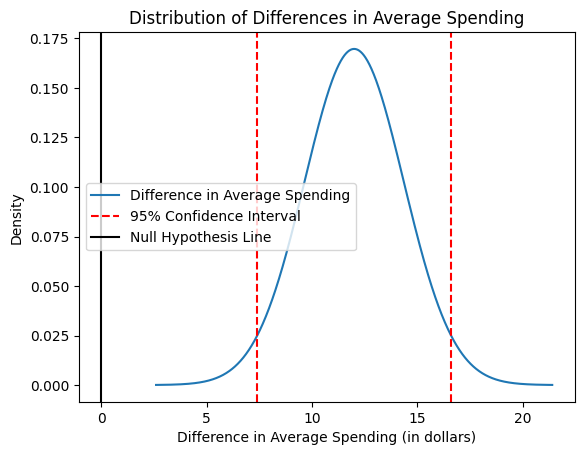

In [ ]:
# Plot the distribution of the difference in average spending
std_spend_A = 50  # Assumed standard deviation for Version A
std_spend_B = 55  # Assumed standard deviation for Version B

# Calculate the standard error of the difference in mean spending
se_A = std_spend_A / np.sqrt(n_A)
se_B = std_spend_B / np.sqrt(n_B)
se_diff = np.sqrt(se_A**2 + se_B**2)

# Difference in average spending
diff = mean_spend_B - mean_spend_A

z_score = norm.ppf(0.975)
ci_lower = diff - z_score * se_diff
ci_upper = diff + z_score * se_diff

x = np.linspace(diff - 4*se_diff, diff + 4*se_diff, 1000)
y = norm.pdf(x, diff, se_diff)

plt.plot(x, y, label="Difference in Average Spending")
plt.axvline(ci_lower, color='red', linestyle='--', label="95% Confidence Interval")
plt.axvline(ci_upper, color='red', linestyle='--')
plt.axvline(0, color='black', linestyle='-', label="Null Hypothesis Line")
plt.title("Distribution of Differences in Average Spending")
plt.xlabel("Difference in Average Spending (in dollars)")
plt.ylabel("Density")
plt.legend()
plt.show()


It looks extremely implausible that the difference between the amount of dollars spent we observed (described by the distribution in blue) actually comes from a reality where the two webpages lead to the same amount of dollars spent (equality of means).